<a href="https://colab.research.google.com/github/bmontoyag/UTEC_MISTI_2026/blob/main/housing_modelfittingandvalidation_student_2026.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**If you haven't already, please hit :**

`File` -> `Save a Copy in Drive`

**to copy this notebook to your Google drive, and work on a copy. If you don't do this, your changes won't be saved!**

# Model Training and Validation with the California Dataset

In [1]:
# Python libraries for scientific computing and data manipulation
import numpy as np  # Provides multidimensional array object and mathematical operations
import pandas as pd  # Offers data structures and operations for manipulating numerical tables and time series

# Libraries for data visualization
import matplotlib.pyplot as plt  # A comprehensive library for creating static, animated, and interactive visualizations
import seaborn as sns  # Extends Matplotlib’s functionality with a high-level interface for drawing attractive statistical graphics

# Scikit-learn: machine learning library
from sklearn.linear_model import LinearRegression  # Class implementing ordinary least-squares linear regression
from sklearn.linear_model import Ridge, Lasso, ElasticNet  # Regularized linear models to reduce overfitting and improve generalization

# Tools for data splitting, model evaluation, and scaling
from sklearn.model_selection import train_test_split  # Splits arrays or matrices into random train and test subsets
from sklearn.metrics import mean_squared_error  # Calculates the mean squared error for regression models
from sklearn.preprocessing import StandardScaler  # Standardizes features by removing the mean and scaling to unit variance

# Sample dataset: California housing
from sklearn.datasets import fetch_openml  # Function to fetch the California housing dataset for regression tasks

## Load the California Housing Dataset

First, we load the california housing dataset. You can explore the dataset a bit from the output of either `print(california_housing.DESCR)` or `california_housing_df.describe()` when the data is put into a dataframe.

In [2]:
california_housing = fetch_openml(
    data_id=44977,
    as_frame=True,
    parser="pandas"
)

print(california_housing.DESCR)

**Data Description**

Information on the variables was collected using all the block groups in California from the 1990 Census. In this sample a block group on average includes 1425.5 individuals living in a geographically compact area. Naturally, the geographical area included varies inversely with the population density. Distances among the centroids of each block group were computed as measured in latitude and longitude. All the block groups reporting zero entries for the independent and dependent variables were excluded. The final data contained 20,640 observations on 9 variables. 

Each row in the dataset represents one census block group. A block group is the smallest geographical unit for which the U.S. Census Bureau publishes sample data (a block group typically has a population of 600 to 3,000 people).

The goal of the dataset is to predict the median house value. The original dataset description advised to predict the value using logarithmic transform.


**Attribute Descripti

In [4]:
california_housing_df = california_housing.frame

california_housing_df.rename(columns={'longitude': 'longitude'}, inplace=True)
california_housing_df.rename(columns={'latitude': 'latitude'}, inplace=True)
california_housing_df.rename(columns={'housingMedianAge': 'housing_median_age'}, inplace=True)
california_housing_df.rename(columns={'totalRooms': 'avg_rooms'}, inplace=True)
california_housing_df.rename(columns={'totalBedrooms': 'avg_bedrooms'}, inplace=True)
california_housing_df.rename(columns={'population': 'population'}, inplace=True)
california_housing_df.rename(columns={'households': 'avg_household_size'}, inplace=True)
california_housing_df.rename(columns={'medianIncome': 'median_income'}, inplace=True)
california_housing_df.rename(columns={'medianHouseValue': 'median_house_value'}, inplace=True)

california_housing_df['avg_rooms'] = california_housing_df['avg_rooms'] / california_housing_df['avg_household_size']
california_housing_df['avg_bedrooms'] = california_housing_df['avg_bedrooms'] / california_housing_df['avg_household_size']
california_housing_df['avg_household_size'] = california_housing_df['population'] / california_housing_df['avg_household_size']
california_housing_df['median_house_value'] = california_housing_df['median_house_value'] / 100000

california_housing_df.describe()

,longitude,latitude,housing_median_age,avg_rooms,avg_bedrooms,population,avg_household_size,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,5.429000,1.096675,1425.476744,3.070655,3.870671,2.068558
std,2.003532,2.135952,12.585558,2.474173,0.473911,1132.462122,10.386050,1.899822,1.153956
min,-124.350000,32.540000,1.000000,0.846154,0.333333,3.000000,0.692308,0.499900,0.149990
25%,-121.800000,33.930000,18.000000,4.440716,1.006079,787.000000,2.429741,2.563400,1.196000
50%,-118.490000,34.260000,29.000000,5.229129,1.048780,1166.000000,2.818116,3.534800,1.797000
75%,-118.010000,37.710000,37.000000,6.052381,1.099526,1725.000000,3.282261,4.743250,2.647250
max,-114.310000,41.950000,52.000000,141.909091,34.066667,35682.000000,1243.333333,15.000100,5.000010


## EXERCISE 1: Fit a LinearRegression Model

Here, we will fit a simple linear regression on the california housing dataset.

Tasks:

1A. Load your input data into a variable `X` using either the `california_housing_df` or `california_housing` variable. Next, load your target variable data into a variable `y` using either the `california_housing_df` or `california_housing` variable.

1B. Train a LinearRegression() model predicting `y` using all input features `X`. Print the r-squared value as well as the mean squared error using the LinearRegression() class's `.score(~)` method and the loaded `mean_squared_error(~)` function. *Remember, for mean squared error, you will need to compare the the predicted target using the model versus the actual target.*

1C. Visualize your model predictions. Make sure you understand the plot. *Remember, you cannot directly plot high-dimensional data, but we can visualize the predictions on test data.*


### TASK 1A: Load input and target variables

In [10]:
# TASK 1A EXERCISE

# Select features and target variable
X = california_housing_df.drop("median_house_value", axis=1)
y = california_housing_df["median_house_value"]

### TASK 1B: Train a model without splitting your data

In [11]:
# TASK 1B EXERCISE

# Train and evaluate the model on the entire dataset
model_no_split = LinearRegression()
model_no_split.fit(X, y)
y_pred_no_split = model_no_split.predict(X) # using your model, predict the target variable
r_squared_no_split = model_no_split.score(X, y)
mse_no_split =mean_squared_error(y, y_pred_no_split)

print(f"Without splitting the data:")
print(f"R-squared: {r_squared_no_split}")
print(f"Mean Squared Error: {mse_no_split}\n")

Without splitting the data:
R-squared: 0.606232685199805
Mean Squared Error: 0.5243209861846072



### TASK 1C: Visualize your Model Fit (True y vs. Predicted y)

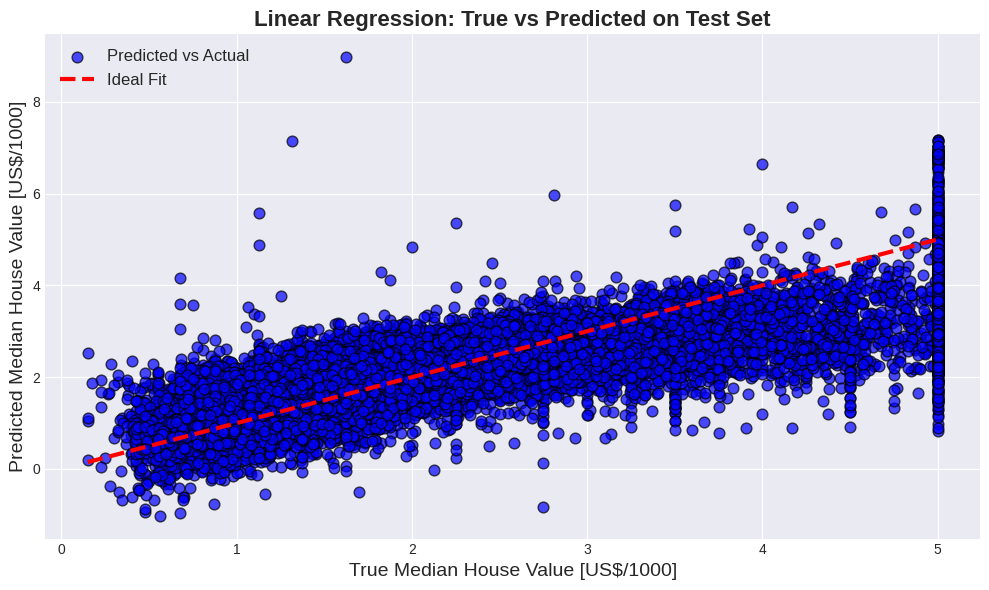

In [12]:
# TASK 1C EXERCISE

# Visualize the Results --------------------------------------------------------
# You cannot directly plot high-dimensional data, but we can visualize the predictions on test data

# Plot the true vs. predicted values for the test set with enhancements
plt.style.use('seaborn-v0_8-darkgrid')  # Switch to a cleaner, modern style
plt.figure(figsize=(10, 6))

# Scatter plot for the true vs predicted values with larger markers
plt.scatter(y, y_pred_no_split, color='blue', edgecolor='k', alpha=0.7, s=60, label='Predicted vs Actual')

# Add the ideal fit line
plt.plot([min(y), max(y)], [min(y), max(y)], 'r--', lw=3, label='Ideal Fit')

# Add gridlines for better readability
plt.grid(True)

# Enhanced labels and title with increased font size and clarity
plt.xlabel('True Median House Value [US$/1000]', fontsize=14)
plt.ylabel('Predicted Median House Value [US$/1000]', fontsize=14)
plt.title('Linear Regression: True vs Predicted on Test Set', fontsize=16, fontweight='bold')

# Customize the legend for better readability
plt.legend(loc='upper left', fontsize=12)

# Adjust layout for a cleaner appearance
plt.tight_layout()

# Show the plot
plt.show()

## EXERCISE 2: Why do we need to do train-test splitting prior to fitting a machine learning model?

In this exercise, we will explore how train-test splitting helps us build more robust and reliable machine learning models by preventing overfitting and ensuring our model can generalize well to new data.

Tasks:

2A. Split the dataset into training and testing sets using the `train_test_split(~)` function, and then fit the model again. Again, print the r-squared value as well as the mean squared error using the LinearRegression() class's `.score(~)` method and the loaded `mean_squared_error(~)` function. Compare the r-squared values between each model.

2B. Visualize your model predictions. Make sure you understand the plot. *Remember, you cannot directly plot high-dimensional data, but we can visualize the predictions on test data.*


### TASK 2A: Split your Data into Training and Testing Sets then fit a LinearRegression Model

In [14]:
# TASK 2A EXERCISE

# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model on the training set
model_split = LinearRegression()
model_split.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred_test_split = model_split.predict(X_test) # using your model, predict the target variable
r_squared_split = model_split.score(X_test, y_test)
mse_split = mean_squared_error(y_test, y_pred_test_split)

print(f"With splitting the data:")
print(f"R-squared: {r_squared_split}")
print(f"Mean Squared Error: {mse_split}")

With splitting the data:
R-squared: 0.5757877060324506
Mean Squared Error: 0.5558915986952446


### TASK 2B: Visualize your Model Fit (True y vs. Predicted y)

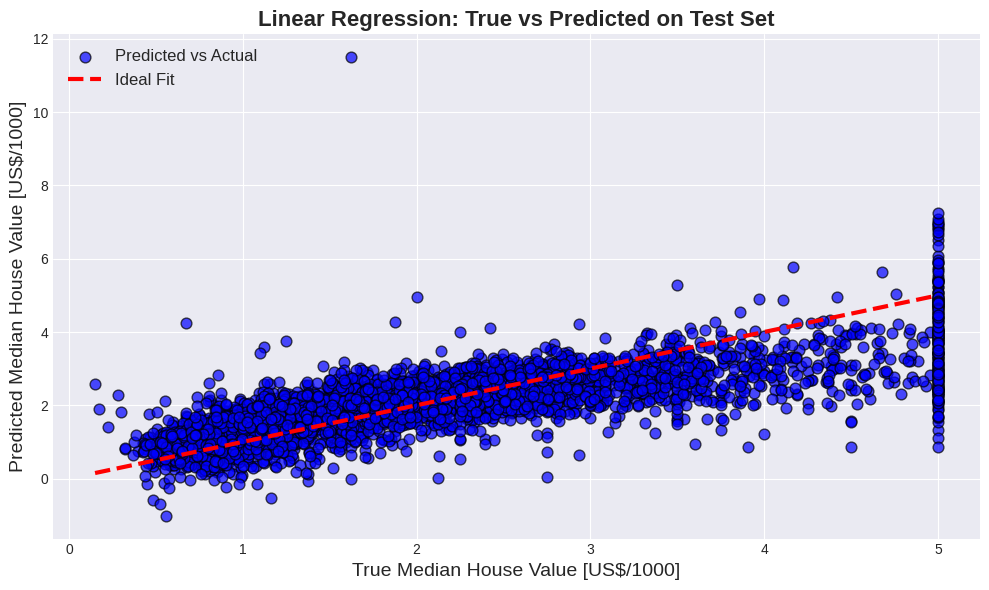

In [15]:
# TASK 2B EXERCISE

# Visualize the Results --------------------------------------------------------
# You cannot directly plot high-dimensional data, but we can visualize the predictions on test data

# Plot the true vs. predicted values for the test set with enhancements
plt.style.use('seaborn-v0_8-darkgrid')  # Switch to a cleaner, modern style
plt.figure(figsize=(10, 6))

# Scatter plot for the true vs predicted values with larger markers
plt.scatter(y_test, y_pred_test_split, color='blue', edgecolor='k', alpha=0.7, s=60, label='Predicted vs Actual')

# Add the ideal fit line
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', lw=3, label='Ideal Fit')

# Add gridlines for better readability
plt.grid(True)

# Enhanced labels and title with increased font size and clarity
plt.xlabel('True Median House Value [US$/1000]', fontsize=14)
plt.ylabel('Predicted Median House Value [US$/1000]', fontsize=14)
plt.title('Linear Regression: True vs Predicted on Test Set', fontsize=16, fontweight='bold')

# Customize the legend for better readability
plt.legend(loc='upper left', fontsize=12)

# Adjust layout for a cleaner appearance
plt.tight_layout()

# Show the plot
plt.show()


## EXERCISE 3: Explore Different Types of Linear Regression from an Optimization Perspective

In this exercise, we will explore different types of linear regression and compare their performance and coefficients.

Tasks:

3A. Standardize your data using the `StandardScaler()` class, and its `.fit_transform(~)` and `.transform(~)` methods. Standardizing the data is an important preprocessing step for models like Ridge, Lasso, and Elastic Net, as they are sensitive to the scale of input features.

3B. Fit a standard `LinearRegression()`: Use the scaled input data to train and evaluate a standard Linear Regression model (no regularization).

3C. Fit a `Ridge()` regression: Train and evaluate a Ridge Regression model, adjusting the regularization parameter `alpha` as needed.

3D. Fit a `Lasso()` regression: Train and evaluate a Lasso Regression model, using the `alpha` parameter for regularization.

3E. Fit an ElasticNet() regression: Train and evaluate an Elastic Net Regression model, using both `alpha` (regularization strength) and `l1_ratio` (balance between L1 and L2 regularization).

3F. Visualize model coefficients: Compare the coefficients from Linear, Ridge, Lasso, and Elastic Net regressions in a single plot. Extract the coefficients from each trained model. Each model has a `.coef_` attribute that stores its coefficients. Combine these coefficients into a single array for easy visualization. Use `np.array()` to create a 2D array, where each row corresponds to a model’s coefficients.

3G. Intepret the varied regression fits: Compare the predictions of all models (Linear, Ridge, Lasso, and Elastic Net) against the true values on the test data.

### TASK 3A: Standardize your data

In [16]:
# TASK 3A EXERCISE

# Standardize your data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### TASK 3B: Fit Linear Regression (No Regularization)


In [17]:
# TASK 3B EXERCISE

# Fit a Linear Regression model without regularization
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

r_sq_linear_train = linear_model.score(X_train_scaled, y_train)
r_sq_linear_test = linear_model.score(X_test_scaled, y_test)
print(f'Linear Regression - Training R²: {r_sq_linear_train}, Test R²: {r_sq_linear_test}')

Linear Regression - Training R²: 0.6125511913966952, Test R²: 0.5757877060324511


### TASK 3C: Fit Ridge Regression

In [18]:
# TASK 3C EXERCISE

# Fit a Ridge Regression model
ridge_model = Ridge(alpha=1.0) # You can adjust alpha, a common starting point is 1.0
ridge_model.fit(X_train_scaled, y_train)

r_sq_ridge_train = ridge_model.score(X_train_scaled, y_train)
r_sq_ridge_test = ridge_model.score(X_test_scaled, y_test)
print(f'Ridge Regression - Training R²: {r_sq_ridge_train}, Test R²: {r_sq_ridge_test}')

Ridge Regression - Training R²: 0.6125511218634558, Test R²: 0.5758157428913682


### TASK 3D: Fit Lasso Regression


In [19]:
# TASK 3D EXERCISE

# Fit a Lasso Regression model
lasso_model = Lasso(alpha=0.01) # You can adjust alpha, a common starting point is 0.01
lasso_model.fit(X_train_scaled, y_train)

r_sq_lasso_train = lasso_model.score(X_train_scaled, y_train)
r_sq_lasso_test = lasso_model.score(X_test_scaled, y_test)
print(f'Lasso Regression - Training R²: {r_sq_lasso_train}, Test R²: {r_sq_lasso_test}')

Lasso Regression - Training R²: 0.6084704508407244, Test R²: 0.5816141135870057


### TASK 3E: Fit Elastic Net Regression

In [20]:
# TASK 3E EXERCISE

# Fit an Elastic Net Regression model
elastic_net_model = ElasticNet(alpha=0.1, l1_ratio=0.5) # You can adjust alpha and l1_ratio
elastic_net_model.fit(X_train_scaled, y_train)

r_sq_elastic_train = elastic_net_model.score(X_train_scaled, y_train)
r_sq_elastic_test = elastic_net_model.score(X_test_scaled, y_test)
print(f'Elastic Net - Training R²: {r_sq_elastic_train}, Test R²: {r_sq_elastic_test}')

Elastic Net - Training R²: 0.5307617725059076, Test R²: 0.5147648965887333


### TASK 3F: Visualize Model Coefficients for Comparison

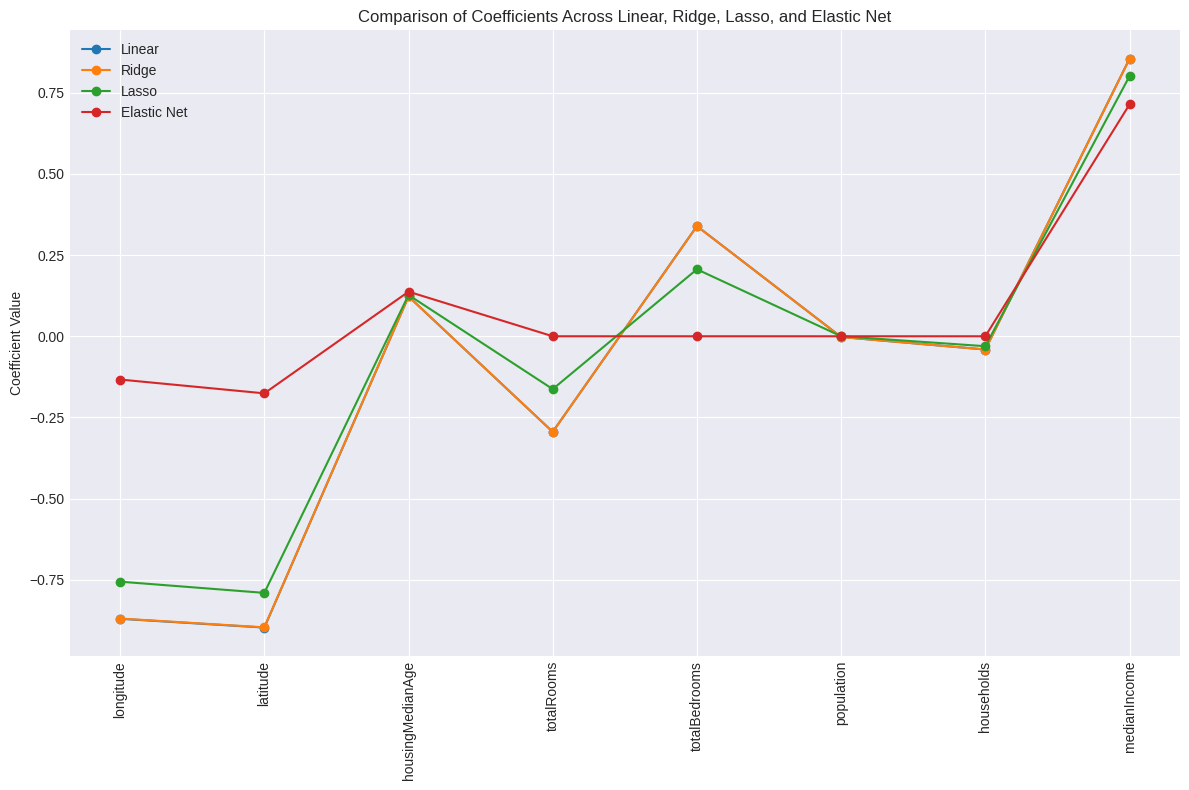

In [21]:
# TASK 3F EXERCISE

# Visualize the coefficients for all models
coefficients = np.array([
    linear_model.coef_,
    ridge_model.coef_,
    lasso_model.coef_,
    elastic_net_model.coef_
])

plt.figure(figsize=(12, 8))
plt.plot(coefficients.T, marker='o')
plt.xticks(np.arange(X_train.shape[1]), california_housing.feature_names, rotation=90)
plt.title('Comparison of Coefficients Across Linear, Ridge, Lasso, and Elastic Net')
plt.legend(['Linear', 'Ridge', 'Lasso', 'Elastic Net'])
plt.ylabel('Coefficient Value')
plt.grid(True)
plt.tight_layout()
plt.show()

### TASK 3G: Visualize the Differences in the Regression Fits with and without Regularization

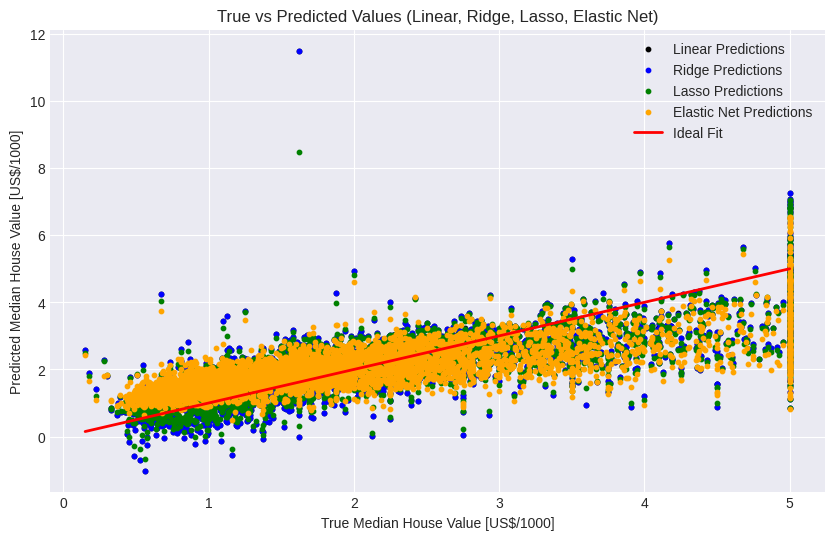

In [22]:
# TASK 3G EXERCISE

# Visualize Predictions on Test Data for All Models ----------------------------
y_pred_linear = linear_model.predict(X_test_scaled)
y_pred_ridge = ridge_model.predict(X_test_scaled)
y_pred_lasso = lasso_model.predict(X_test_scaled)
y_pred_elastic = elastic_net_model.predict(X_test_scaled)

# Plot True vs Predicted for All Models
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_linear, color='black', s=10, label='Linear Predictions')
plt.scatter(y_test, y_pred_ridge, color='blue', s=10, label='Ridge Predictions')
plt.scatter(y_test, y_pred_lasso, color='green', s=10, label='Lasso Predictions')
plt.scatter(y_test, y_pred_elastic, color='orange', s=10, label='Elastic Net Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r-', lw=2, label='Ideal Fit')

plt.xlabel('True Median House Value [US$/1000]')
plt.ylabel('Predicted Median House Value [US$/1000]')
plt.title('True vs Predicted Values (Linear, Ridge, Lasso, Elastic Net)')
plt.legend()
plt.show()